In [22]:
import numpy as np
import scipy as sp
import scipy.constants as const
import matplotlib.pyplot as plt

In [23]:
k, m = 1, 1
Vel = 0
x_0 = 1
N = 1000
t = 20
dt = 20 / N

In [24]:
def osci(x, v, k, m):
  y, yder =  np.zeros(2), np.zeros(2)
  y[0] = x
  y[1] = v
  yder[0] = y[1]
  yder[1] = -y[0] * k/m
  
  return y, yder

In [25]:
def Eu(x_0, Vel, k, m, N):
        x, v = x_0, Vel
        yy = np.array([x, v], dtype = "float64")
        X = np.array([yy[0]])
        for i in range(N):
                # print(yy)
                yy += osci(yy[0], yy[1], k, m)[1] * dt
                X = np.append(X, yy[0])
                
        return X

In [26]:
def RK2(x_0, Vel, k, m, N):
        x, v = x_0, Vel
        yy = np.array([x, v], dtype = "float64")
        X = np.array([yy[0]])
        for i in range(N):
                k1 = osci(yy[0], yy[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + dt * k1 
                k2 = osci(y_temp[0], y_temp[1], k, m)[1]
                yy += (dt / 2) * (k1 + k2)
                X = np.append(X, yy[0])

        return X


In [27]:
def RK4(x_0, Vel, k, m, N):
        x, v = x_0, Vel
        yy = np.array([x, v], dtype = "float64")
        X = np.array([yy[0]])
        for i in range(N):
                k1 = osci(yy[0], yy[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + (dt/2) * k1 
                k2 = osci(y_temp[0], y_temp[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + (dt/2) * k2
                k3 = osci(y_temp[0], y_temp[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + dt * k3
                k4 = osci(y_temp[0], y_temp[1], k, m)[1]
                yy += (1/6) * dt * (k1 + 2*k2 + 2*k3 + k4)
                X = np.append(X, yy[0])
                
        return X

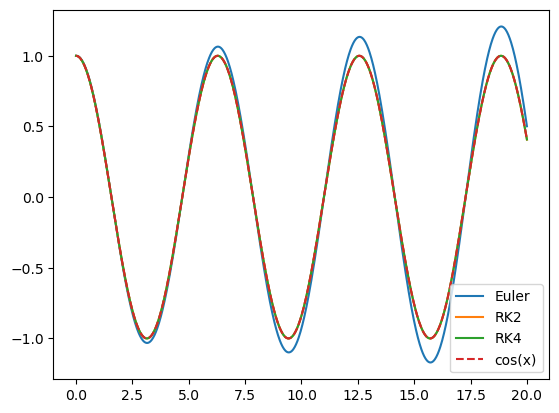

In [28]:
x = np.linspace(0, t, N + 1)

plt.plot(x, Eu(x_0, Vel, k, m, N), label = "Euler")
plt.plot(x, RK2(x_0, Vel, k, m, N), label = "RK2")
plt.plot(x, RK4(x_0, Vel, k, m, N), label = "RK4")

y = np.cos(x)
plt.plot(x, y, "--", label = "cos(x)")
plt.legend()